In [2]:
import featuretools as ft

In [3]:
data = ft.demo.load_mock_customer()

In [4]:
type(data)

dict

In [5]:
type(data["customers"])

pandas.core.frame.DataFrame

In [6]:
data["customers"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    5 non-null      int64         
 1   zip_code       5 non-null      object        
 2   join_date      5 non-null      datetime64[ns]
 3   date_of_birth  5 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 288.0+ bytes


In [7]:
data

{'customers':    customer_id zip_code           join_date date_of_birth
 0            1    60091 2011-04-17 10:48:33    1994-07-18
 1            2    13244 2012-04-15 23:31:04    1986-08-18
 2            3    13244 2011-08-13 15:42:34    2003-11-21
 3            4    60091 2011-04-08 20:08:14    2006-08-15
 4            5    60091 2010-07-17 05:27:50    1984-07-28,
 'sessions':     session_id  customer_id   device       session_start
 0            1            2  desktop 2014-01-01 00:00:00
 1            2            5   mobile 2014-01-01 00:17:20
 2            3            4   mobile 2014-01-01 00:28:10
 3            4            1   mobile 2014-01-01 00:44:25
 4            5            4   mobile 2014-01-01 01:11:30
 5            6            1   tablet 2014-01-01 01:23:25
 6            7            3   tablet 2014-01-01 01:39:40
 7            8            4   tablet 2014-01-01 01:55:55
 8            9            1  desktop 2014-01-01 02:15:25
 9           10            2   tablet 20

In [8]:
customers_df = data["customers"]
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [9]:
sessions_df = data["sessions"]
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [10]:
transactions_df = data["transactions"]
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [11]:
dataframes = {
    "customers" : (customers_df, "customer_id"),
    "sessions" : (sessions_df, "session_id", "session_start"),
    "transactions" : (transactions_df, "transaction_id", "transaction_time")
}

In [12]:
type(dataframes["customers"])

tuple

In [13]:
relationships = [("sessions", "session_id", "transactions", "session_id"),
                ("customers", "customer_id", "sessions", "customer_id")]

In [14]:
type(relationships)

list

In [15]:
feature_matrix_customers, features_defs = ft.dfs(dataframes=dataframes, 
                                                relationships=relationships,
                                                target_dataframe_name="customers")
feature_matrix_customers

,COUNT(sessions),MODE(sessions.device),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),...,STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),MODE(transactions.sessions.device),NUM_UNIQUE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,8,mobile,3,126,139.43,71.631905,5.81,4,5,0.019698,...,0.589386,279.510713,1057.97,582.193117,78.59,40.0,-0.476122,312.745952,mobile,3
2,7,desktop,3,93,146.81,77.422366,8.73,4,5,0.098259,...,0.509798,251.609234,931.63,548.905851,154.60,35.0,-0.277640,258.700528,desktop,3
3,6,desktop,3,93,149.15,67.060430,5.89,1,5,0.418230,...,0.429374,219.021420,847.63,405.237462,66.21,29.0,2.286086,257.299895,desktop,3
4,8,mobile,3,109,149.95,80.070459,5.73,2,5,-0.036348,...,0.387884,235.992478,1157.99,649.657515,131.51,37.0,0.002764,356.125829,mobile,3
5,6,mobile,3,79,149.02,80.375443,7.55,5,5,-0.025941,...,0.415426,402.775486,839.76,472.231119,86.49,30.0,0.014384,259.873954,mobile,3


In [16]:
type(feature_matrix_customers)

pandas.core.frame.DataFrame

In [17]:
feature_matrix_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 74 columns):
 #   Column                                              Non-Null Count  Dtype   
---  ------                                              --------------  -----   
 0   COUNT(sessions)                                     5 non-null      Int64   
 1   MODE(sessions.device)                               5 non-null      category
 2   NUM_UNIQUE(sessions.device)                         5 non-null      Int64   
 3   COUNT(transactions)                                 5 non-null      Int64   
 4   MAX(transactions.amount)                            5 non-null      float64 
 5   MEAN(transactions.amount)                           5 non-null      float64 
 6   MIN(transactions.amount)                            5 non-null      float64 
 7   MODE(transactions.product_id)                       5 non-null      category
 8   NUM_UNIQUE(transactions.product_id)                 5 non-null      Int64 

In [18]:
feature_matrix_customers.describe()

,COUNT(sessions),NUM_UNIQUE(sessions.device),COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),SUM(transactions.amount),...,STD(sessions.NUM_UNIQUE(transactions.product_id)),STD(sessions.SKEW(transactions.amount)),STD(sessions.SUM(transactions.amount)),SUM(sessions.MAX(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),SUM(sessions.MIN(transactions.amount)),SUM(sessions.NUM_UNIQUE(transactions.product_id)),SUM(sessions.SKEW(transactions.amount)),SUM(sessions.STD(transactions.amount)),NUM_UNIQUE(transactions.sessions.device)
count,5.0,5.0,5.0,5.000000,5.000000,5.000000,5.0,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.0
mean,7.0,3.0,100.0,146.872000,75.312120,6.742000,5.0,0.094780,42.198986,7507.972000,...,0.185159,0.466374,277.781866,966.996000,531.645013,103.480000,34.200000,0.309895,288.949232,3.0
std,1.0,0.0,18.0,4.320431,5.795829,1.343845,0.0,0.188439,3.054389,1308.017586,...,0.256468,0.082375,73.332366,138.241611,95.248199,37.736456,4.658326,1.123611,44.274754,0.0
min,6.0,3.0,79.0,139.430000,67.060430,5.730000,5.0,-0.036348,37.705178,6236.620000,...,0.000000,0.387884,219.021420,839.760000,405.237462,66.210000,29.000000,-0.476122,257.299895,3.0
25%,6.0,3.0,93.0,146.810000,71.631905,5.810000,5.0,-0.025941,40.442059,6349.660000,...,0.000000,0.415426,235.992478,847.630000,472.231119,78.590000,30.000000,-0.277640,258.700528,3.0
50%,7.0,3.0,93.0,149.020000,77.422366,5.890000,5.0,0.019698,43.683296,7200.280000,...,0.000000,0.429374,251.609234,931.630000,548.905851,86.490000,35.000000,0.002764,259.873954,3.0
75%,8.0,3.0,109.0,149.150000,80.070459,7.550000,5.0,0.098259,44.095630,8727.680000,...,0.408248,0.509798,279.510713,1057.970000,582.193117,131.510000,37.000000,0.014384,312.745952,3.0
max,8.0,3.0,126.0,149.950000,80.375443,8.730000,5.0,0.418230,45.068765,9025.620000,...,0.517549,0.589386,402.775486,1157.990000,649.657515,154.600000,40.000000,2.286086,356.125829,3.0


In [19]:
type(features_defs)

list

In [20]:
features_defs

[<Feature: COUNT(sessions)>,
 <Feature: MODE(sessions.device)>,
 <Feature: NUM_UNIQUE(sessions.device)>,
 <Feature: COUNT(transactions)>,
 <Feature: MAX(transactions.amount)>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: MIN(transactions.amount)>,
 <Feature: MODE(transactions.product_id)>,
 <Feature: NUM_UNIQUE(transactions.product_id)>,
 <Feature: SKEW(transactions.amount)>,
 <Feature: STD(transactions.amount)>,
 <Feature: SUM(transactions.amount)>,
 <Feature: DAY(date_of_birth)>,
 <Feature: DAY(join_date)>,
 <Feature: MONTH(date_of_birth)>,
 <Feature: MONTH(join_date)>,
 <Feature: WEEKDAY(date_of_birth)>,
 <Feature: WEEKDAY(join_date)>,
 <Feature: YEAR(date_of_birth)>,
 <Feature: YEAR(join_date)>,
 <Feature: MAX(sessions.COUNT(transactions))>,
 <Feature: MAX(sessions.MEAN(transactions.amount))>,
 <Feature: MAX(sessions.MIN(transactions.amount))>,
 <Feature: MAX(sessions.NUM_UNIQUE(transactions.product_id))>,
 <Feature: MAX(sessions.SKEW(transactions.amount))>,
 <Feature: MAX(ses

In [21]:
feature_matrix_sessions, session_features_defs = ft.dfs(dataframes=dataframes,
                                                      relationships=relationships,
                                                      target_dataframe_name="sessions")
feature_matrix_sessions.head(5)

C:\Users\Marciano\.conda\envs\alteryx\lib\site-packages\featuretools\entityset\entityset.py:660: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index
  warnings.warn("A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: " + ", ".join(extra_params))
C:\Users\Marciano\.conda\envs\alteryx\lib\site-packages\featuretools\entityset\entityset.py:660: UserWarning: A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: index, time_index
  warnings.warn("A Woodwork-initialized DataFrame was provided, so the following parameters were ignored: " + ", ".join(extra_params))


,customer_id,device,COUNT(transactions),MAX(transactions.amount),MEAN(transactions.amount),MIN(transactions.amount),MODE(transactions.product_id),NUM_UNIQUE(transactions.product_id),SKEW(transactions.amount),STD(transactions.amount),...,customers.STD(transactions.amount),customers.SUM(transactions.amount),customers.DAY(date_of_birth),customers.DAY(join_date),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.WEEKDAY(date_of_birth),customers.WEEKDAY(join_date),customers.YEAR(date_of_birth),customers.YEAR(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
1,2,desktop,16,141.66,76.813125,20.91,3,5,0.295458,41.600976,...,37.705178,7200.28,18,15,8,4,0,6,1986,2012
2,5,mobile,10,135.25,74.696000,9.32,5,5,-0.160550,45.893591,...,44.095630,6349.66,28,17,7,7,5,5,1984,2010
3,4,mobile,15,147.73,88.600000,8.70,1,5,-0.324012,46.240016,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011
4,1,mobile,25,129.00,64.557200,6.29,5,5,0.234349,40.187205,...,40.442059,9025.62,18,17,7,4,0,6,1994,2011
5,4,mobile,11,139.20,70.638182,7.43,5,5,0.336381,48.918663,...,45.068765,8727.68,15,8,8,4,1,4,2006,2011


In [22]:
feature = session_features_defs[18]
feature

<Feature: MODE(transactions.YEAR(transaction_time))>

In [23]:
type(feature)

featuretools.feature_base.feature_base.AggregationFeature

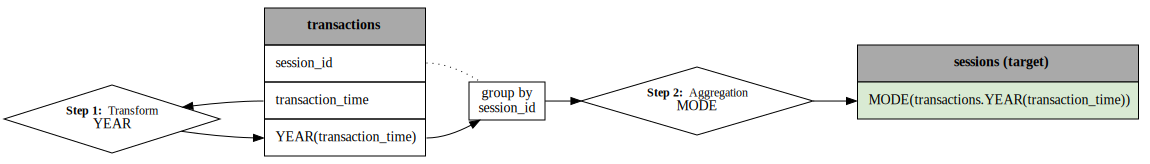

In [24]:
ft.graph_feature(feature)

In [25]:
ft.describe_feature(feature)

'The most frequently occurring value of the year of the "transaction_time" of all instances of "transactions" for each "session_id" in "sessions".'